___
# Linear Regression: Housing Data

The first part of the notebook based on the the USA Housing Dataset by Jose Portilla, which contains:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

The second part of the notebook is based on the Boston House Market Dataset.

### Imports

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

### Check the data

In [7]:
df = pd.read_csv('USA_Housing.csv')

In [8]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [11]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# EDA

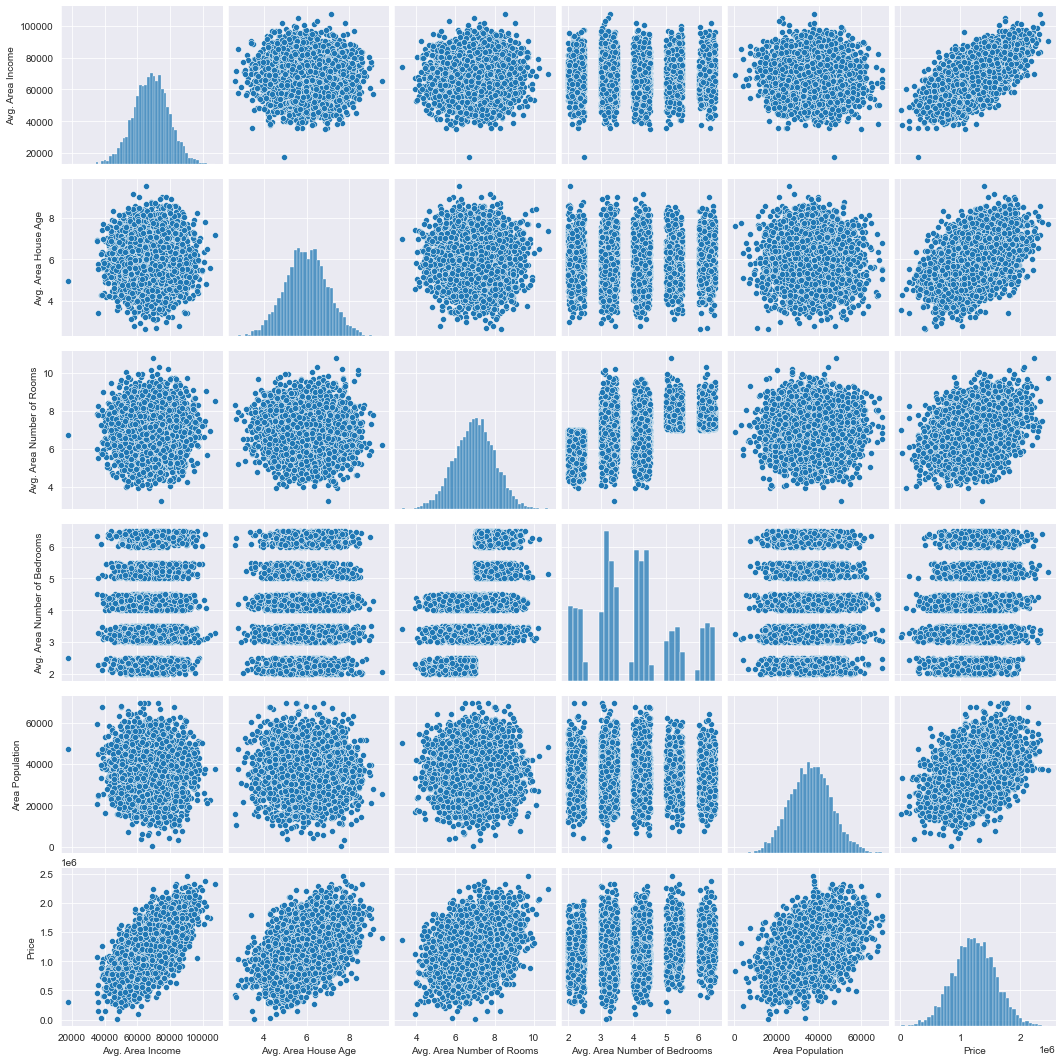

In [12]:
sns.pairplot(df)

/private/var/containers/Bundle/Application/F42AAFF3-49AA-48B2-9911-7FE7192DB3C1/Carnets-sci.app/Library/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

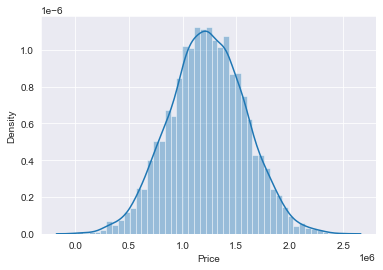

In [13]:
sns.distplot(df['Price'])

<AxesSubplot:>

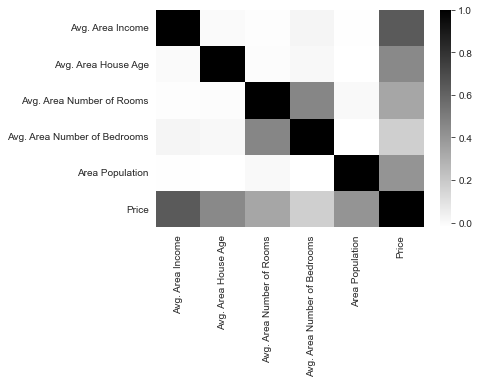

In [14]:
sns.heatmap(df.corr(), cmap="binary")

## Linear Regression Model

### X and y arrays

In [15]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

## Train Test Split

* Train model on training set
* Evaluate model on the test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

## Creating and Training the Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [21]:
print(lm.intercept_)

-2616998.0228818776


In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.384444
Avg. Area House Age,162975.483408
Avg. Area Number of Rooms,121802.121132
Avg. Area Number of Bedrooms,1934.163056
Area Population,15.189607


Interpretation:

- 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

## Predictions

In [23]:
predictions = lm.predict(X_test)

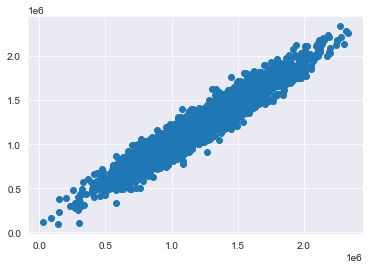

In [24]:
plt.scatter(y_test,predictions)

**Residual Histogram**

/private/var/containers/Bundle/Application/F42AAFF3-49AA-48B2-9911-7FE7192DB3C1/Carnets-sci.app/Library/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


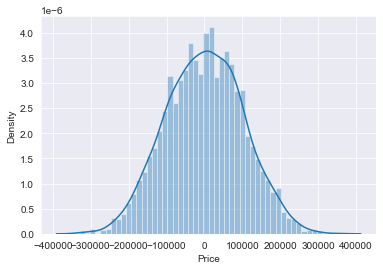

In [25]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [26]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82336.52594520213
MSE: 10354334181.172688
RMSE: 101756.2488556486


## Linear Regression Model on Real Data

In [28]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)
boston_df = boston.data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### X and y arrays

In [66]:
X = boston.data
y= boston.target

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=101)

In [68]:
lm2 = LinearRegression()

In [69]:
lm2.fit(X_train,y_train)

LinearRegression()

In [70]:
print(lm2.intercept_)

24.970453412767505


### Coefficients: variation of price depending on different parameters

In [71]:
coeff_df2 = pd.DataFrame(lm2.coef_)
coeff_df2

,0
0,-0.095249
1,0.024738
2,0.080716
3,1.780923
4,-13.537554
5,4.765524
6,-0.013109
7,-1.052394
8,0.195881
9,-0.011099


### Interpretation:

#### 1 unit increase in __ associated with a change of  __. (\$1000)

        - CRIM     : -0.095249
        - ZN       :  0.024738
        - INDUS    :  0.080716
        - CHAS     :  1.780923
        - NOX      : -13.537554
        - RM       :  4.765524
        - AGE      : -0.013109
        - DIS      : -1.052394
        - RAD      :  0.195881
        - TAX      : -0.011099
        - PTRATIO  : -0.908038
        - B        :  0.010670
        - LSTAT    : -0.449670

Text(0, 0.5, 'Prediction')

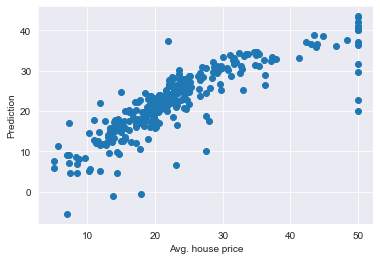

In [72]:
predictions2 = lm2.predict(X_test)
plt.scatter(y_test,predictions2)
plt.xlabel("Avg. house price")
plt.ylabel("Prediction")

/private/var/containers/Bundle/Application/F42AAFF3-49AA-48B2-9911-7FE7192DB3C1/Carnets-sci.app/Library/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


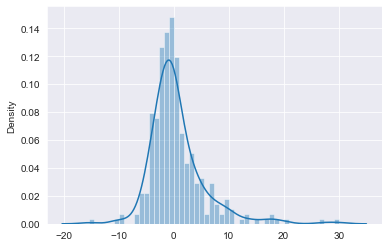

In [73]:
sns.distplot((y_test-predictions2),bins=50);

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 3.307853799244542
MSE: 26.672083045748643
RMSE: 5.1645022069652216


### Predicting price based on the avg number of rooms

In [75]:
X_rooms = X[:,5]

In [76]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1,1)

Text(0, 0.5, 'Avg. price of house')

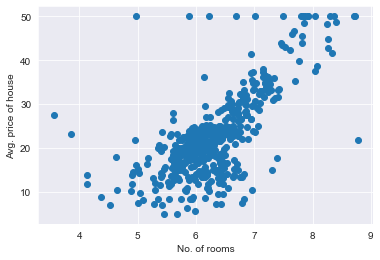

In [51]:
plt.scatter(X_rooms, y)
plt.xlabel("No. of rooms")
plt.ylabel("Avg. price of house")

In [52]:
lm3 = LinearRegression()

In [78]:
lm3.fit(X_rooms, y)

LinearRegression()

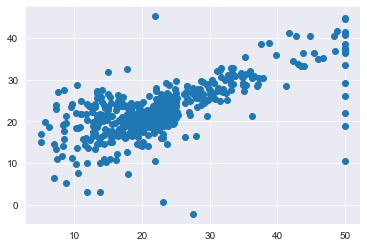

In [79]:
predictions3 = lm3.predict(X_rooms)
plt.scatter(y, predictions3)

### Predicting price based on the weighted distances to five Boston employment centres

In [80]:
X_distance = X[:,7]

In [81]:
X_distance = X_distance.reshape(-1,1)
y = y.reshape(-1,1)

Text(0, 0.5, 'Avg. price of house')

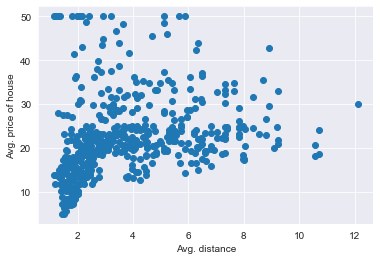

In [82]:
plt.scatter(X_distance, y)
plt.xlabel("Avg. distance")
plt.ylabel("Avg. price of house")

In [64]:
lm4 = LinearRegression()

In [83]:
lm4.fit(X_distance, y)

LinearRegression()

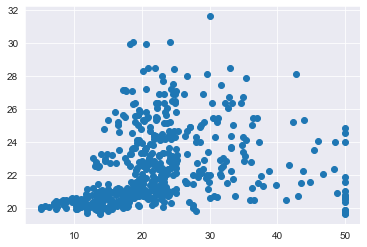

In [84]:
predictions4 = lm4.predict(X_distance)
plt.scatter(y, predictions4)